# Классификация уровня серьёзности дорожных происшествий в Америке, штат Огайо за 2016-2020 гг.

### Имеется следующий набор данных:
1. Severity - степень серьёзности аварии;
2. Start_Time - время начала дорожного происшествия;
3. End_Time - время окончания дорожного происшествия (обозначает время, когда происшествие перестаёт влиять на транспортный поток);
4. Start_Lat - широта координат точки начала происшествия по данным GPS;
5. Start_Lng - долгота координат точки начала происшествия по данным GPS;
6. End_Lat - широта координат точки окончания происшествия по данным GPS;
7. End_Lng - долгота координат точки окончания происшествия по данным GPS;
8. Distance - длина дороги, задействованная происшествием;
9. Description - описание происшествия;
10. Number - номер улицы, на которой произошло происшествие;
11. Street - название улицы, на которой произошло происшествие;
12. Side - сторона дороги, на которой произошло происшествие;
13. City - город;
14. County - округ;
15. State - штат;
16. Zipcode - почтовый индекс в записи адреса места, в котором произошло происшествие;
17. Country - страна;
18. Timezone - часовой пояс;
19. Airport_Code - кол ближайшего аэропорта;
20. Weather_Time - время, в которое записаны данные о погоде;
21. Temperature - температура;
22. Wind_Chill - ветро-холодовой индекс;
23. Humidity - влажность воздуха;
24. Pressure - давление воздуха;
25. Visibility - видимость;
26. Wind_Direction - направление ветра;
27. Wind_Speed - скорость ветра;
28. Precipitation - количество осадков;
29. Weather_Condition - состояние погоды;
30. Amenity - наличие удобств поблизости от места происшествия;
31. Bump - наличие искусственных неровностей на дороге (лежачие полицейские или неровная дорога);
32. Crossing - наличие пересечения дорог поблизости от места происшествия;
33. Give_Way - наличие условий, в которых один участник дорожного движения должен уступить дорогу другому;
34. Junction - наличие перекрёстков поблизости от места происшествия;
35. No_Exit - наличие тупиков поблизости от места происшествия;
36. Railway - наличие железных дорог поблизости от места происшествия;
37. Roundabout - наличие кругового движения поблизости от места происшествия;
38. Station - наличие ж/д, метро и пр. станций поблизости от места происшествия;
39. Stop - наличие знака "Стоп" поблизости от места происшествия;
40. Traffic_Calming - наличие на дороге мер по замедлению дорожного движения;
41. Traffic_Signal - наличие светофоров;
42. Turning_Loop - наличие разворота;
43. Sunrise_Sunset - восход или закат;
44. Civil_Twilight - гражданские сумерки;
45. Nautical_Twilight - навигационные сумерки;
46. Astronomical_Twilight - астрономические сумерки;

По данному набору данных необходимо предсказать степень серьёзности дорожных происшествий. Целевая переменная - severity, может принимать целые значения из диапазона \[1, 4\].

## 1. Чтение данных из файла

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline 

In [46]:
path = "./US_Accidents_OH_state.csv"
data = pd.read_csv(path)

Первые и последние значения из таблицы данных:

In [47]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [48]:
data.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
22039,A-4236937,4,2019-08-20 01:05:28,2019-08-20 01:34:15,39.936110,-82.26019,39.947960,-82.041350,11.622,Closed between OH-668/Exit 141 and US-40/Exit ...,...,False,False,False,False,False,False,Night,Night,Night,Night
22040,A-4236938,4,2019-08-20 01:05:28,2019-08-20 01:34:15,39.948170,-82.04328,39.936277,-82.260179,11.519,Closed between US-40/Exit 152 and OH-668/Exit ...,...,False,False,False,False,False,False,Night,Night,Night,Night
22041,A-4237399,2,2019-08-20 08:48:24,2019-08-20 09:18:20,41.094601,-81.49969,41.093173,-81.499516,0.099,At OH-59/Perkins St - Accident. Lane blocked. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
22042,A-4237401,2,2019-08-20 10:29:32,2019-08-20 10:58:14,41.094601,-81.49969,41.093173,-81.499516,0.099,At OH-59/Perkins St - Accident. Lane blocked.,...,False,False,False,False,False,False,Day,Day,Day,Day
22043,A-4237403,2,2019-08-20 14:29:28,2019-08-20 14:59:14,39.318530,-84.42744,39.324310,-84.421390,0.514,At Union Centre Blvd/Exit 19 - Accident. Lane ...,...,False,False,False,False,False,False,Day,Day,Day,Day


Более подробное описание данных датасета:

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22044 entries, 0 to 22043
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22044 non-null  object 
 1   Severity               22044 non-null  int64  
 2   Start_Time             22044 non-null  object 
 3   End_Time               22044 non-null  object 
 4   Start_Lat              22044 non-null  float64
 5   Start_Lng              22044 non-null  float64
 6   End_Lat                22044 non-null  float64
 7   End_Lng                22044 non-null  float64
 8   Distance(mi)           22044 non-null  float64
 9   Description            22044 non-null  object 
 10  Number                 7069 non-null   float64
 11  Street                 22044 non-null  object 
 12  Side                   22044 non-null  object 
 13  City                   22044 non-null  object 
 14  County                 22044 non-null  object 
 15  St

Можно заметить, что для некоторых характеристик имеются пропущенные значения: Number, Weather_Timestamp, Temperature, Wind_Chill, Humidity, Pressure, Visibilitym, Wind_Direction, Wind_Speed, Precipitation, Weather_Condition.

## 2. Визуализация данных и вычисление основных характеристик

Для получения основных характрестик вызовем функцию describe:

In [50]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,22044.000000,22044.000000,22044.000000,22044.000000,22044.000000,22044.000000,7069.000000,21903.000000,12532.000000,21855.000000,21922.000000,21870.000000,20186.000000,10555.000000
mean,2.557068,40.253650,-83.130484,40.253654,-83.130562,0.783367,5951.686660,55.323426,44.683171,69.732327,29.707432,8.939159,9.542113,0.014468
std,0.885271,0.851789,1.158850,0.852084,1.159009,2.065922,8243.251526,18.835000,22.772460,19.504574,0.506599,2.695163,5.198349,0.054343
min,1.000000,38.428203,-84.819760,38.428203,-84.819980,0.000000,1.000000,-14.800000,-33.500000,13.000000,28.100000,0.000000,0.000000,0.000000
25%,2.000000,39.678090,-84.224913,39.677931,-84.225059,0.003000,1295.000000,41.000000,27.575000,55.000000,29.240000,10.000000,5.800000,0.000000
50%,2.000000,39.974140,-83.086530,39.973870,-83.086530,0.281000,3499.000000,55.900000,40.300000,71.000000,29.890000,10.000000,9.000000,0.000000
75%,3.000000,41.123941,-81.818180,41.124855,-81.819360,0.876250,7607.000000,71.100000,64.000000,86.000000,30.090000,10.000000,12.700000,0.000000
max,4.000000,41.937120,-80.519010,42.234200,-79.779650,150.138000,83423.000000,95.000000,94.000000,100.000000,30.810000,20.000000,39.100000,1.310000


Как видно из следующего графика, распределение целевой переменной несбалансированно:

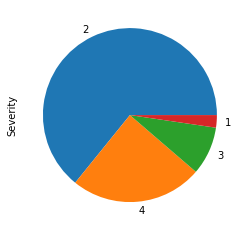

In [8]:
data.Severity.value_counts().plot.pie()
pass

Выберем бинарные, числовые и некоторые категориальные признаки:

In [51]:
binaries = data.select_dtypes(include='bool')
numerics = data.select_dtypes(include='float64')
categorials =  data[['Side', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]

Построим круговые диаграммы для бинарных и категориальных признаков:

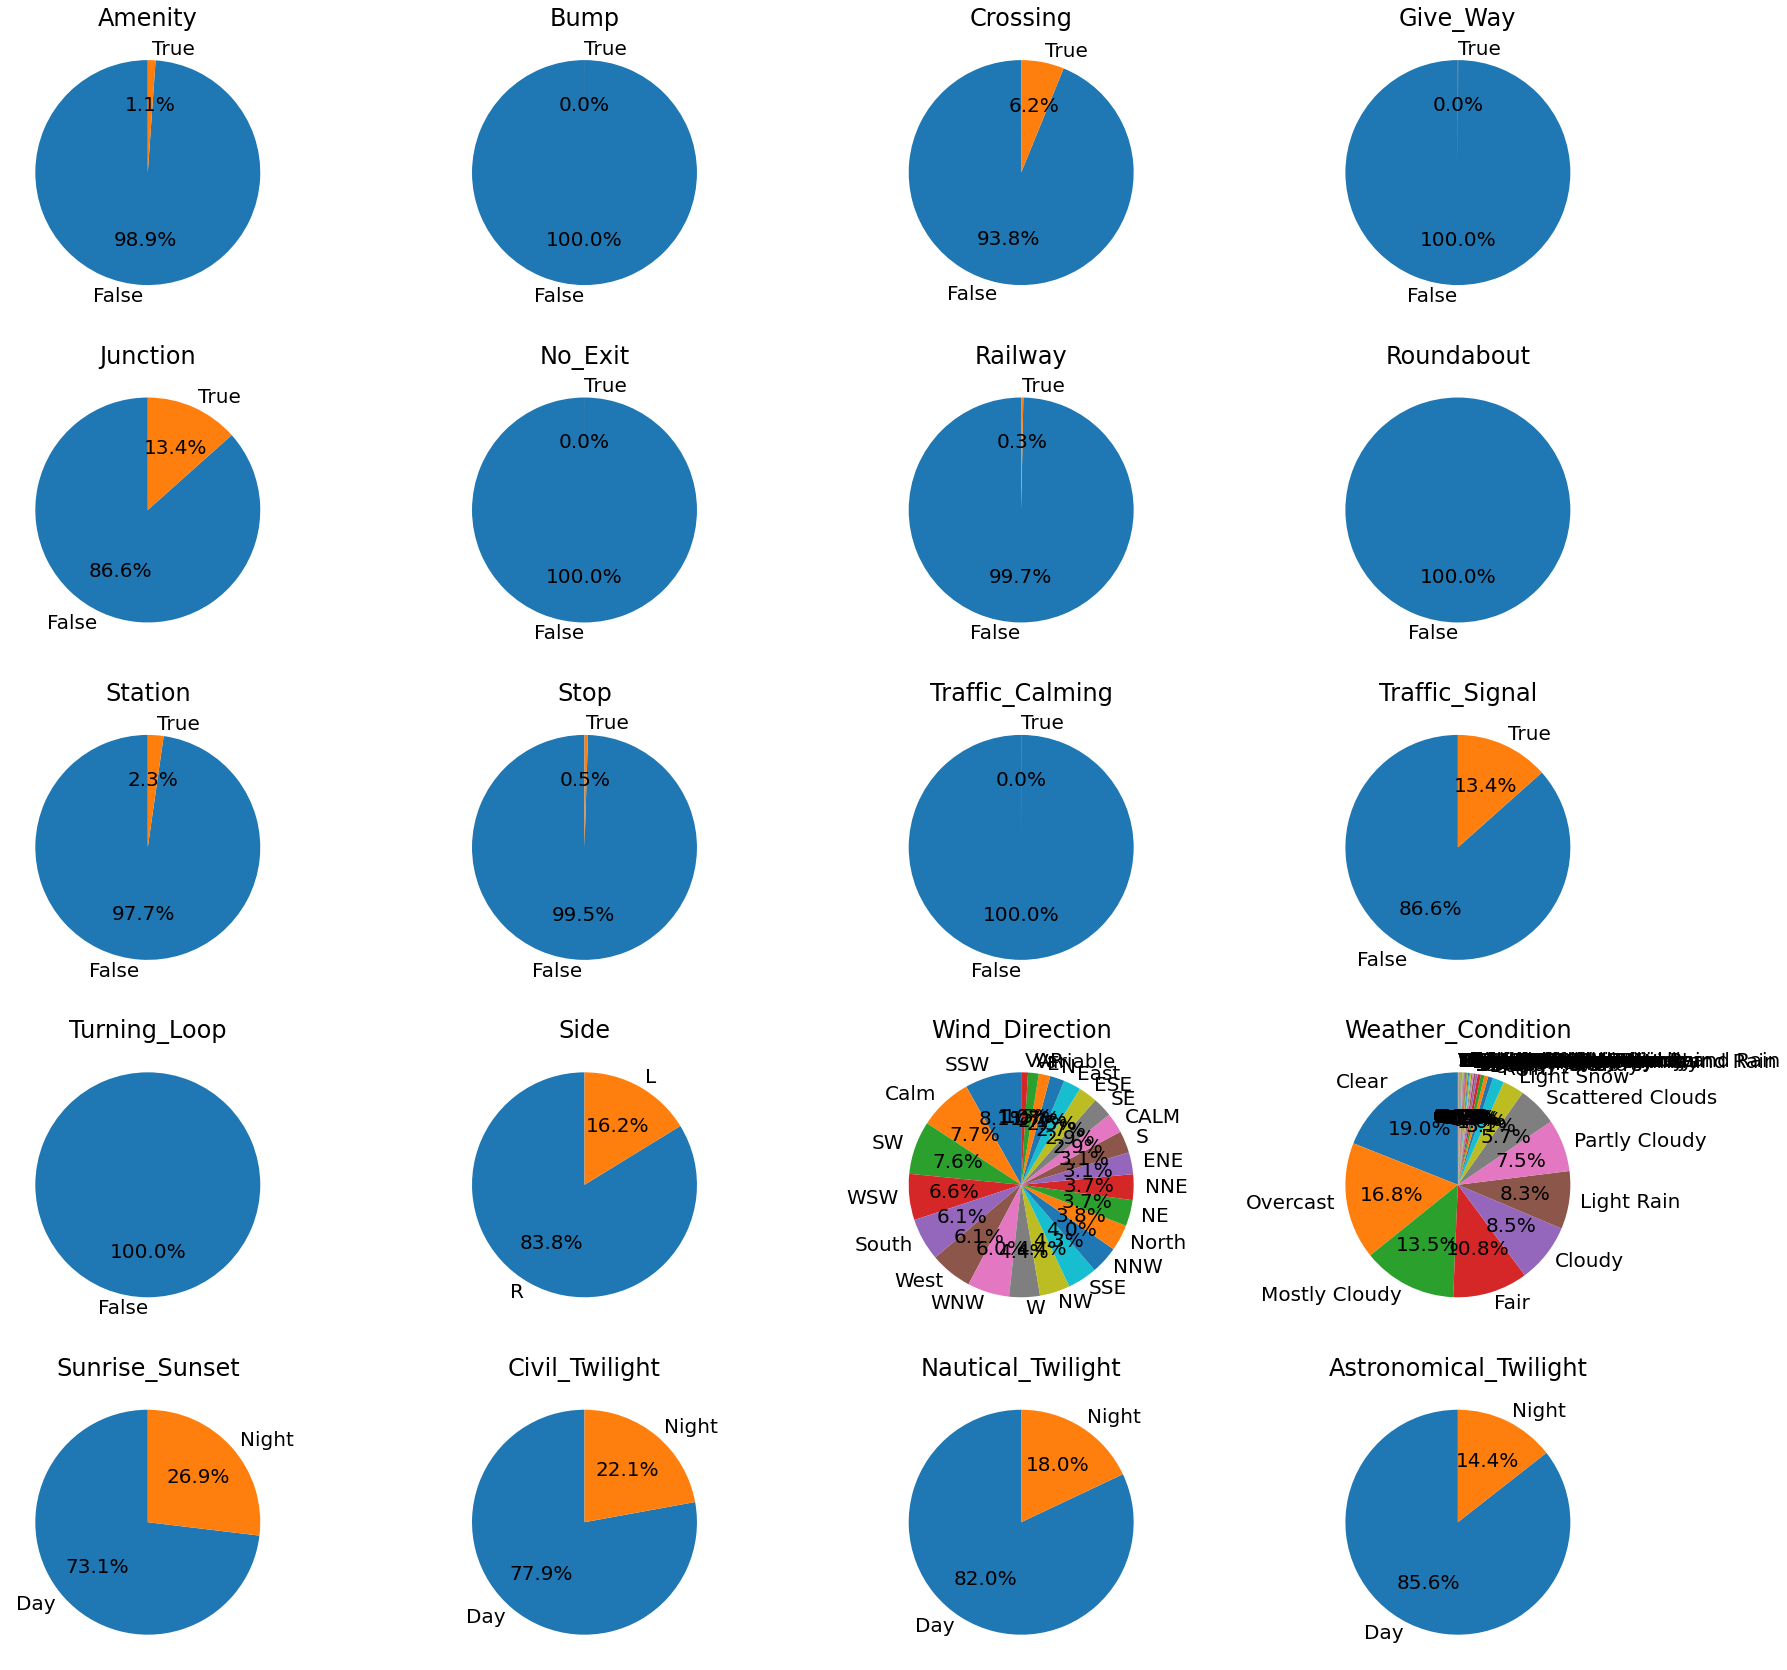

In [9]:
bin_cat = pd.concat((binaries, categorials), axis=1)
fig, axes = plt.subplots(5, 4, figsize=(30, 30))
for i, col in enumerate(bin_cat.columns):
    bin_cat[col].value_counts().plot.pie(subplots=True, ax=axes[i // 4, i % 4], autopct='%1.1f%%', startangle=90, fontsize=20, title=False, ylabel='')
    axes[i//4, i%4].set_title(bin_cat.columns[i], fontsize=24)

Построим матрицу корреляции для числовых характеристик:

In [52]:
corr_mat = numerics.corr()
corr_mat

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Start_Lat,1.000000,0.743486,0.999563,0.743582,0.034948,0.167923,-0.052117,-0.132087,-0.058797,0.011526,0.054156,0.140230,-0.025594
Start_Lng,0.743486,1.000000,0.743304,0.999751,0.032118,0.321382,-0.035295,-0.135644,-0.059074,0.067074,0.058999,0.098515,0.000017
End_Lat,0.999563,0.743304,1.000000,0.743678,0.034188,0.167822,-0.052211,-0.132307,-0.058653,0.011679,0.053765,0.140515,-0.025670
End_Lng,0.743582,0.999751,0.743678,1.000000,0.030759,0.321646,-0.035635,-0.136122,-0.058770,0.067260,0.058937,0.098491,-0.000042
Distance(mi),0.034948,0.032118,0.034188,0.030759,1.000000,0.123438,-0.033179,-0.125197,0.042231,0.148559,-0.023398,-0.009624,0.024546
Number,0.167923,0.321382,0.167822,0.321646,0.123438,1.000000,0.000105,-0.100611,-0.004995,0.228706,0.052643,0.010724,0.011924
Temperature(F),-0.052117,-0.035295,-0.052211,-0.035635,-0.033179,0.000105,1.000000,0.993718,-0.298596,-0.197548,0.211525,-0.074810,0.048038
Wind_Chill(F),-0.132087,-0.135644,-0.132307,-0.136122,-0.125197,-0.100611,0.993718,1.000000,-0.334239,-0.616061,0.214756,-0.132322,0.012011
Humidity(%),-0.058797,-0.059074,-0.058653,-0.058770,0.042231,-0.004995,-0.298596,-0.334239,1.000000,0.059631,-0.476881,-0.166959,0.262844
Pressure(in),0.011526,0.067074,0.011679,0.067260,0.148559,0.228706,-0.197548,-0.616061,0.059631,1.000000,-0.021897,-0.087326,0.135750


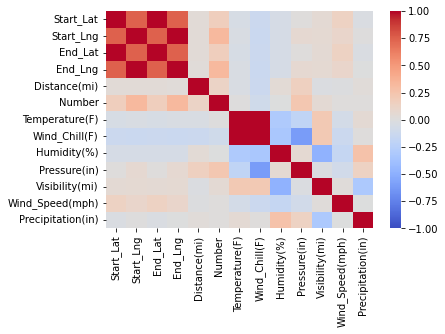

In [11]:
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='coolwarm')
pass

По данной таблице видна высокая корреляция Start_Lat и End_Lat, Start_Lng и End_Lng, что естественно, т.к. координаты начала и окончания дорожного происшествия, как правило, близки. Кроме того, высока корреляция Temperature и Wind_Chill. Также наблюдается обратная корреляция между параметрами Wind_Chill и Pressure.

<Figure size 2160x2160 with 0 Axes>

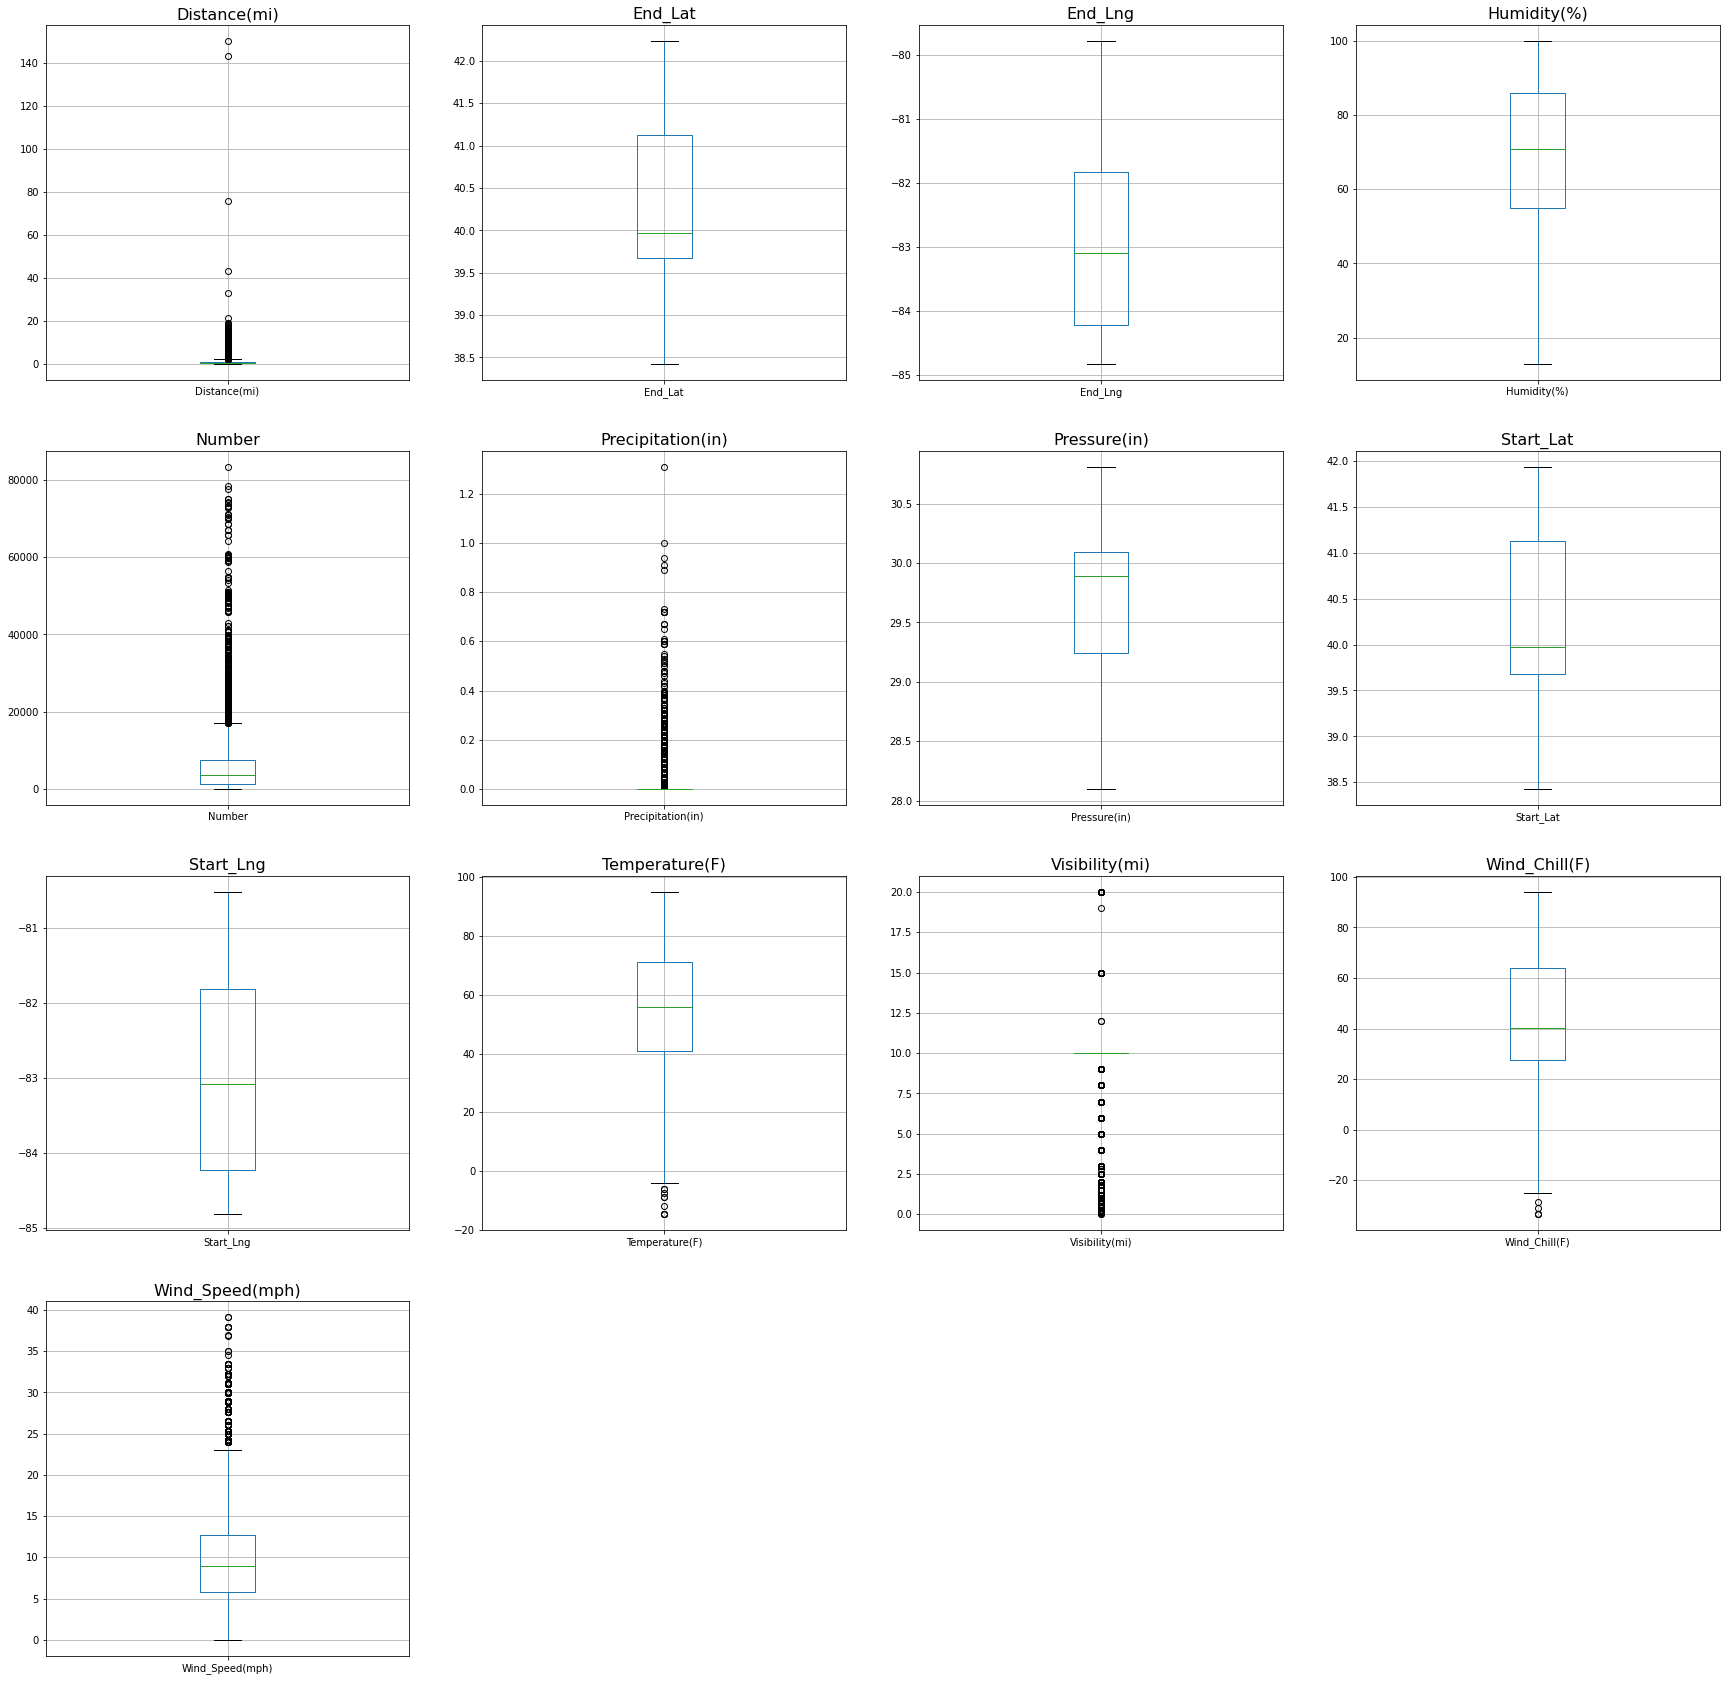

In [12]:
plt.figure(figsize=(30, 30))

fig, axes = plt.subplots(4, 4, figsize=(30, 30))

for i, col in enumerate(sorted(numerics.columns)):
    numerics.boxplot(column=col, ax=axes[i // 4, i % 4])
    axes[i//4, i%4].set_title(col, fontsize=16)

axes[3, 1].axis('off');
axes[3, 2].axis('off');
axes[3, 3].axis('off');
pass

Можно отметить большое количество выбросов для параметров Distance, Number, Precipitation, Visibility, Wind_Speed.

Построим для следующих данных попарные графики зависимости:

In [53]:
numerics_scatters=data[['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']]

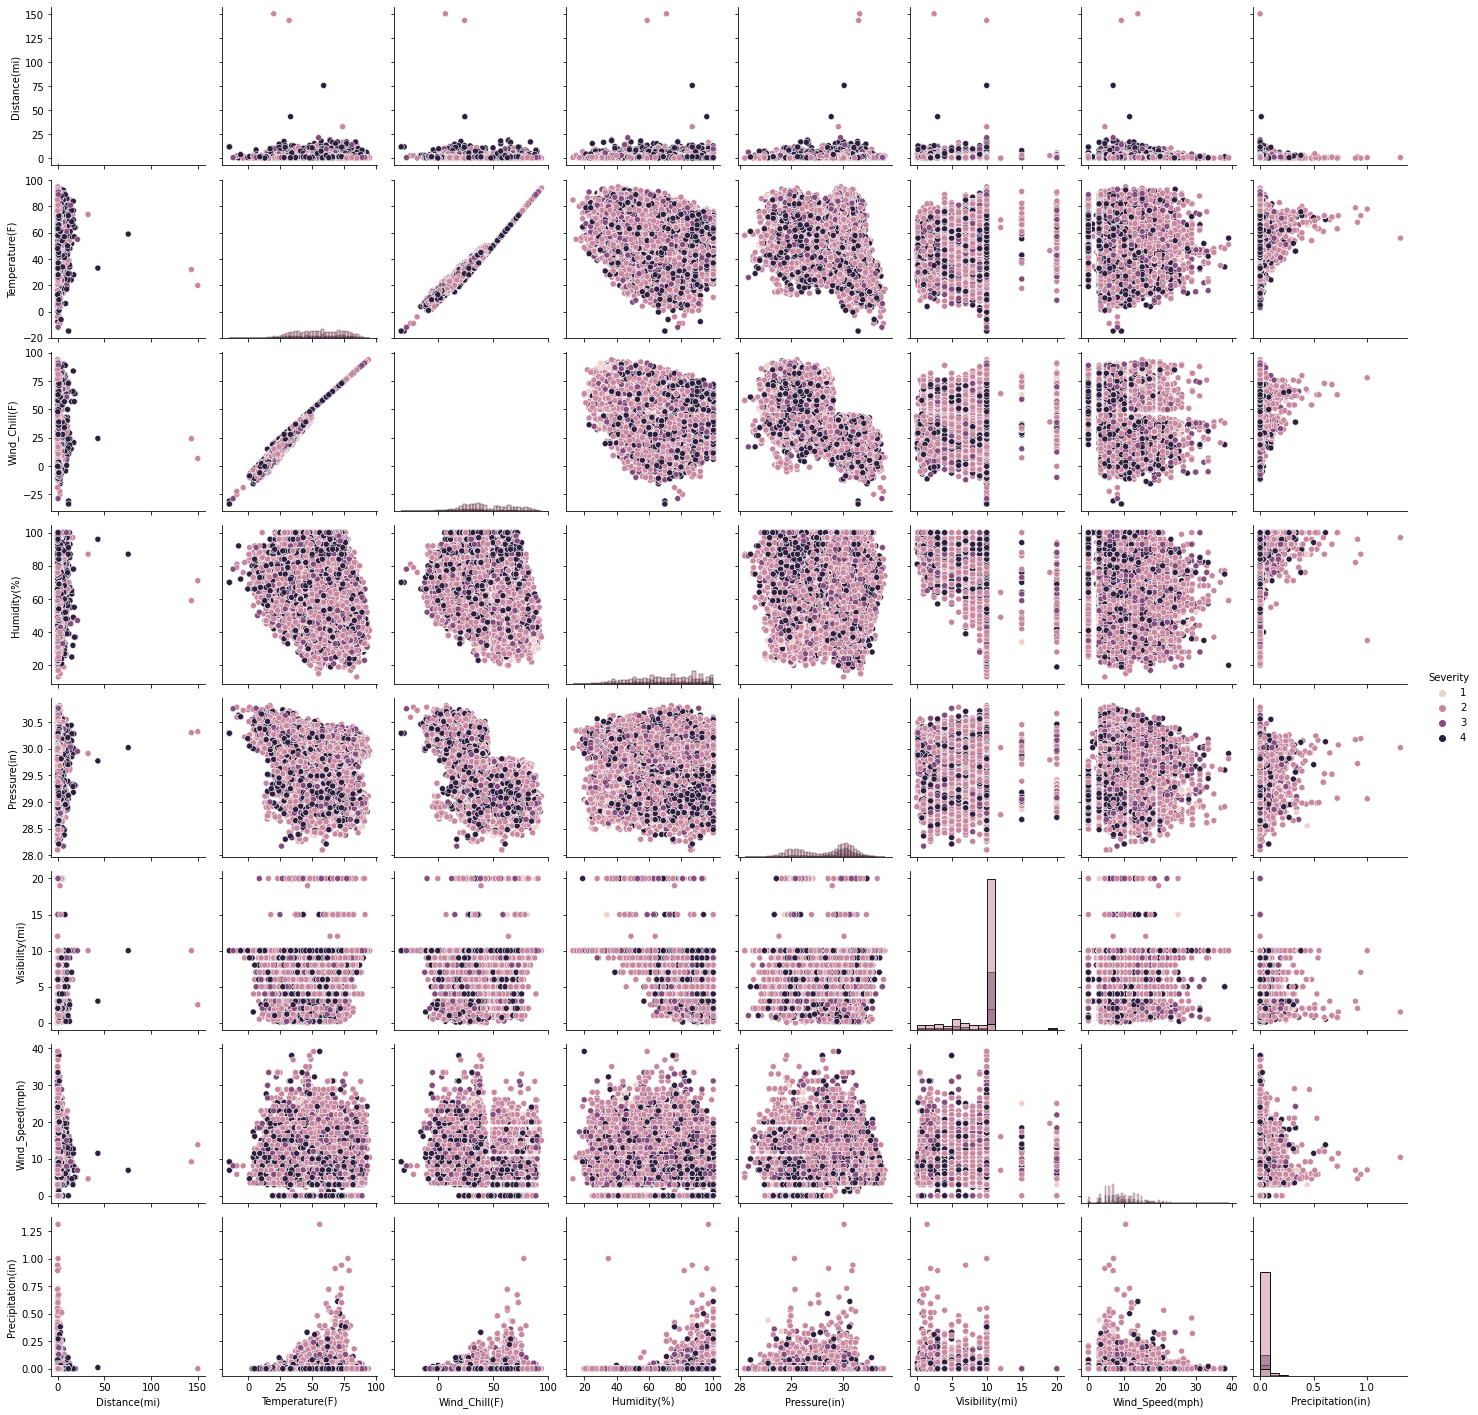

In [14]:
sns.pairplot(numerics_scatters, hue='Severity', diag_kind='hist')
pass

## 3. Обработка пропущенных значений

Для признаков Number и Precipitation пропущено очень много значений, поэтому попробуем исключить эти столбцы

In [54]:
numerics = numerics.drop(['Number', 'Precipitation(in)'], axis=1)
print(numerics)

       Start_Lat  Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0      40.108910  -83.09286  40.112060 -83.031870         3.230   
1      39.865420  -84.06280  39.865010 -84.048730         0.747   
2      39.102660  -84.52468  39.102090 -84.523960         0.055   
3      39.101480  -84.52341  39.098410 -84.522410         0.219   
4      41.062130  -81.53784  41.062170 -81.535470         0.123   
...          ...        ...        ...        ...           ...   
22039  39.936110  -82.26019  39.947960 -82.041350        11.622   
22040  39.948170  -82.04328  39.936277 -82.260179        11.519   
22041  41.094601  -81.49969  41.093173 -81.499516         0.099   
22042  41.094601  -81.49969  41.093173 -81.499516         0.099   
22043  39.318530  -84.42744  39.324310 -84.421390         0.514   

       Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0                42.1           36.1         58.0         29.76   
1                36.9            NaN         91.0         29.

Для остальных столбцов заменим пропущенные значения в столбцах с численными признаками медианами, а в столбцах с категориальными признаками модой:

In [55]:
numerics.fillna(numerics.median(axis=0), axis=0 , inplace=True)
numerics.isna().sum()

Start_Lat          0
Start_Lng          0
End_Lat            0
End_Lng            0
Distance(mi)       0
Temperature(F)     0
Wind_Chill(F)      0
Humidity(%)        0
Pressure(in)       0
Visibility(mi)     0
Wind_Speed(mph)    0
dtype: int64

In [56]:
import warnings
warnings.filterwarnings('ignore')

categorials['Wind_Direction'   ].fillna(categorials['Wind_Direction'   ].mode().iloc[0], inplace=True)
categorials['Weather_Condition'].fillna(categorials['Weather_Condition'].mode().iloc[0], inplace=True)
categorials.isna().sum()

Side                     0
Wind_Direction           0
Weather_Condition        0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

## Борьба с выбросами

Обработаем выбросы для признаков Distance, Visibility и Wind_Speed.

In [57]:
data = pd.concat((data['Severity'], binaries, categorials, numerics), axis=1)
data['Distance(mi)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.000
0.010    0.000
0.050    0.000
0.100    0.000
0.500    0.281
0.900    2.026
0.950    3.049
0.990    7.054
0.995    9.578
Name: Distance(mi), dtype: float64

In [58]:
data['Visibility(mi)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.5
0.010     0.8
0.050     2.5
0.100     5.0
0.500    10.0
0.900    10.0
0.950    10.0
0.990    15.0
0.995    20.0
Name: Visibility(mi), dtype: float64

In [59]:
data['Wind_Speed(mph)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     3.0
0.100     3.5
0.500     9.0
0.900    16.1
0.950    18.4
0.990    24.2
0.995    27.6
Name: Wind_Speed(mph), dtype: float64

In [60]:
rows_to_drop = data[
    (data['Distance(mi)'] < data['Distance(mi)'].quantile(0.005)) | (data['Distance(mi)'] > data['Distance(mi)'].quantile(0.995)) | 
    (data['Visibility(mi)']  < data['Visibility(mi)'].quantile(0.005)) | (data['Visibility(mi)']  > data['Visibility(mi)'].quantile(0.995)) |
    (data['Wind_Speed(mph)']  < data['Wind_Speed(mph)'].quantile(0.005)) | (data['Wind_Speed(mph)']  > data['Wind_Speed(mph)'].quantile(0.995))].index
data = data.drop(rows_to_drop)
print(data.shape)

(21742, 32)


In [61]:
binaries = data.select_dtypes(include='bool')
numerics = data.select_dtypes(include='float64')
categorials =  data[['Side', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]

## 4. Обработка категориальных признаков

In [62]:
categorial_dummies = pd.get_dummies(categorials, categorials.columns)
categorial_dummies.describe()

,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,...,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Wintry Mix,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
count,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,...,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000
mean,0.162773,0.837227,0.029068,0.074602,0.016558,0.031506,0.026814,0.024745,0.020789,0.037301,...,0.000966,0.000092,0.731993,0.268007,0.779459,0.220541,0.821084,0.178916,0.856315,0.143685
std,0.369166,0.369166,0.168001,0.262754,0.127610,0.174684,0.161545,0.155350,0.142681,0.189503,...,0.031064,0.009591,0.442931,0.442931,0.414621,0.414621,0.383291,0.383291,0.350778,0.350778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Нормализация количественных признаков

In [63]:
numerics_stand = (numerics - numerics.mean(axis = 0)) / numerics.std(axis = 0)
numerics_stand.describe()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,21742.000000,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04
mean,-6.587112e-15,1.227224e-14,4.973995e-15,4.889026e-15,0.000000,1.045781e-17,-1.045781e-16,3.712522e-16,-8.617234e-15,5.228904e-17,-2.222284e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.141849e+00,-1.456864e+00,-2.141641e+00,-1.457001e+00,-0.614995,-3.587636e+00,-4.139536e+00,-2.920791e+00,-3.178809e+00,-3.237493e+00,-1.966771e+00
25%,-6.759013e-01,-9.435610e-01,-6.748753e-01,-9.435414e-01,-0.613264,-7.686097e-01,-2.922871e-01,-7.542433e-01,-9.054228e-01,3.841531e-01,-7.126388e-01
50%,-3.252703e-01,3.946396e-02,-3.253263e-01,3.942019e-02,-0.375122,2.540710e-02,-1.491538e-01,7.110838e-02,3.597658e-01,3.841531e-01,-8.557288e-02
75%,1.020989e+00,1.133641e+00,1.018831e+00,1.132750e+00,0.128007,8.354109e-01,1.226548e-01,8.448756e-01,7.551373e-01,3.841531e-01,5.414930e-01
max,1.982281e+00,2.256049e+00,1.982481e+00,2.256190e+00,7.679266,2.109035e+00,2.956404e+00,1.567058e+00,2.178474e+00,4.196412e+00,3.802236e+00


## 6. Разбиение данных на обучающую и тестовую выборки


In [128]:
x_data = pd.concat((binaries, categorial_dummies, numerics_stand), axis=1)
y_data = data['Severity']

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(17393, 107) (4349, 107)


## 7-8. Запуск классификатора ближайших соседей и вычисление ошибки на обучающей и тестовой выборках

Запустим последовательно классификатор ближайших значений с параметром количества соседей = 1, 2, 5, 10, 15 и 20.

In [119]:
from sklearn.neighbors import KNeighborsClassifier

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")

n_neighbors: 1
train error:  0.0014948542517104581
test error:  0.2664980455277075
--------------
n_neighbors: 2
train error:  0.14005634450641063
test error:  0.2881122097033801
--------------
n_neighbors: 5
train error:  0.20387512217558787
test error:  0.2756955621982065
--------------
n_neighbors: 10
train error:  0.2411889840740528
test error:  0.27155667969648195
--------------
n_neighbors: 15
train error:  0.2533203012706261
test error:  0.2708668659461945
--------------
n_neighbors: 20
train error:  0.2635543034554131
test error:  0.27063692802943207
--------------


In [130]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
print("train error: ", np.mean(knn.predict(x_train) != y_train))
print("test error: ",np.mean(knn.predict(x_test) != y_test))
print("--------------")
print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test, y_test_pred))

train error:  0.0014948542517104581
test error:  0.2664980455277075
--------------
[[  49   49    2    2]
 [  40 2303  218  247]
 [   3  224  115   58]
 [   2  257   57  723]]
              precision    recall  f1-score   support

           1       0.48      0.52      0.50        94
           2       0.82      0.81      0.82      2833
           3       0.29      0.29      0.29       392
           4       0.70      0.70      0.70      1030

    accuracy                           0.73      4349
   macro avg       0.57      0.58      0.58      4349
weighted avg       0.74      0.73      0.73      4349



### Заключение
В рамках данной работы было изучено следующее:
1. методы обработки данных;
2. методы визуализации данных;
3. методы борьбы с пропущенными значениями в данных;
4. методы борьбы с выбросами;
5. методы обработки данных для их использования в алгоритмах машинного обучения: нормализация, бинаризация, разбиение на обучающую и тестовую выборки;
6. методы машинного обучения (метод KNN)

Исходя из полученных результатов можно сделать следующие выводы:
1. При использовании классификатора ближайших соседей увеличение числа соседей мало влияет на процент ошибки на тестовой выборке;
2. Для алгоритма KNN ошибка на тестовой выборке составляет в наилучшем случае (для 1 соседа) 26,6%, в худшем (для 2 соседей) - 28,8%.

# Домашнее задание 6. Нейронная сеть

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs',
                          activation = 'logistic',
                          random_state = 78)

In [30]:
%%time
mlp_model.fit(x_train, y_train)

Wall time: 21.3 s


MLPClassifier(activation='logistic', random_state=78, solver='lbfgs')

In [31]:
mlp_model.predict(x_test)

array([2, 4, 4, ..., 2, 2, 2], dtype=int64)

In [32]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)


In [33]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.23101247628356236 0.24580363301908484


In [34]:
from sklearn.metrics import accuracy_score

### Нейронная сеть с одним скрытым слоем на 100 элементов, подбор параметра alpha

In [93]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

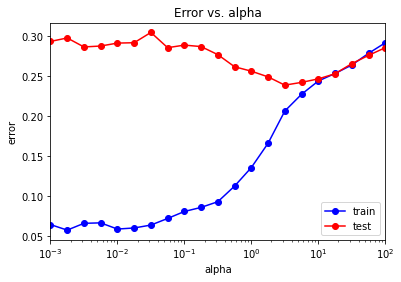

In [94]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

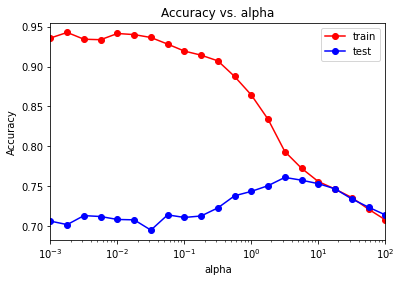

In [95]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [96]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.05732191111366642 0.23890549551621063


In [97]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[3.16227766]


In [98]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.23572701661587994
0.24557369510232238


Выводы: Наилучший результат достигается при alpha = 3.16227766. Ошибка на тестовых данных равна ~0.23-0.24, ошибка на тренировочных данных - ~0.23. При меньшем alpha наблюдается понижение ошибки на тренировочных данных и повышение на тестовых, что свидетельствует о переобучении.

In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[  21   21    2    1]
 [  71 2644  325  412]
 [   0    0    0    1]
 [   2  168   65  616]]


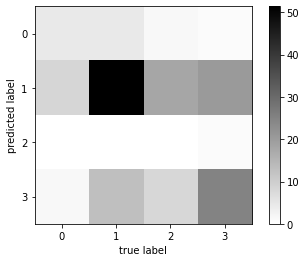

In [100]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [100]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

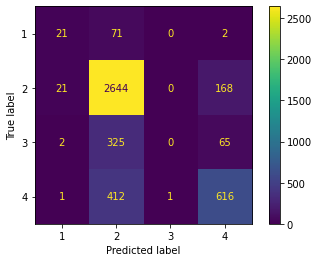

In [102]:
plot_confusion_matrix(mlp_model, x_test, y_test) 

In [103]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.47      0.22      0.30        94
           2       0.77      0.93      0.84      2833
           3       0.00      0.00      0.00       392
           4       0.72      0.60      0.65      1030

    accuracy                           0.75      4349
   macro avg       0.49      0.44      0.45      4349
weighted avg       0.68      0.75      0.71      4349



### Нейронная сеть с двумя скрытыми слоями на 50 элементов каждый

In [35]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, 50), 
                          solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.04507560512849997
0.29914922970797886


Выводы: наблюдается маленькая ошибка (\~0.04) на тренировочных данных и большая ошибка на тестовых данных (\~0.3), что свидетельствует о переобучении. Попробуем подобрать меньшее количество нейронов на каждом слое:

In [39]:
i_ans = -1
j_ans = -1
y_train_ans = 100500
y_test_ans = 100500

for i in [5, 10, 15, 20, 25]:
    for j in [5, 10, 15, 20, 25]:
        mlp_model = MLPClassifier(hidden_layer_sizes = (i, j), 
                                  solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)

        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        print(i, j, ':')
        print(np.mean(y_train != y_train_pred))
        print(np.mean(y_test != y_test_pred))
        if np.mean(y_test != y_test_pred) < y_test_ans:
            i_ans       = i
            j_ans       = j
            y_train_ans = np.mean(y_train != y_train_pred)
            y_test_ans  = np.mean(y_test != y_test_pred)
        print('------')
print("best:", i_ans, j_ans, y_train_ans, y_test_ans)

5 5 :
0.25090553671017074
0.26879742469533224
------
5 10 :
0.2381417811763353
0.26258910094274546
------
5 15 :
0.2482033001782326
0.2616693492756956
------
5 20 :
0.23883171390789398
0.2543113359392964
------
5 25 :
0.2415339504398321
0.25109220510462177
------
10 5 :
0.2203185189444029
0.2595999080248333
------
10 10 :
0.216811360892313
0.248792825936997
------
10 15 :
0.21543149542919565
0.253161646355484
------
10 20 :
0.21491404588052665
0.2568406530236836
------
10 25 :
0.2083021905364227
0.2602897217751207
------
15 5 :
0.20134536882653942
0.24971257760404691
------
15 10 :
0.20295521186684298
0.2524718326051966
------
15 15 :
0.1945610302995458
0.25408139802253393
------
15 20 :
0.19519346863680792
0.26258910094274546
------
15 25 :
0.1965158397056287
0.2644286042768452
------
20 5 :
0.1936411199908009
0.25454127385605885
------
20 10 :
0.17800264474213764
0.2648884801103702
------
20 15 :
0.18076237566837233
0.2586801563577834
------
20 20 :
0.1733455988041166
0.2582202805242

Наилучшие результаты на двухслойной нейронной сети по ошибке на тестовой выборке получились при двух слоях на 10 нейронов каждый. Ошибка на тренировочной выборке ~= 0.21, на тестовой выборке ~0.24. Попробуем для такой нейронной сети подобрать оптимальное значение alpha.

In [40]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10, 10), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

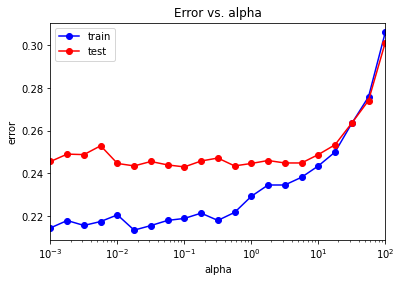

In [41]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

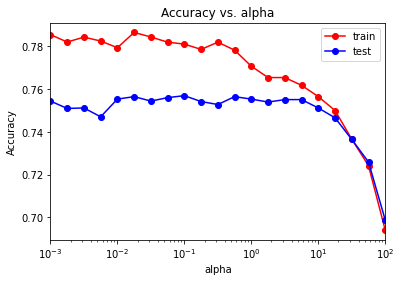

In [42]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

В самом лучшем случае ошибка на тестовой выборке не снижается ниже 0.24, а значение accuracy не поднимается выше 0.79.

### Нейронная сеть с одним скрытым слоем, подбор числа нейронов и оптимального alpha

In [192]:
num_elems_arr = [x for x in range(10, 101, 10)]
alpha_arr = np.logspace(-3, 2, 11)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, num_elems in enumerate(num_elems_arr):
    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (num_elems,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)
        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        train_err[index] = np.append(train_err[index], np.mean(y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(y_test != y_test_pred))
        train_acc[index] = np.append(train_acc[index], accuracy_score(y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(y_test, y_test_pred))
    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])
    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err
    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

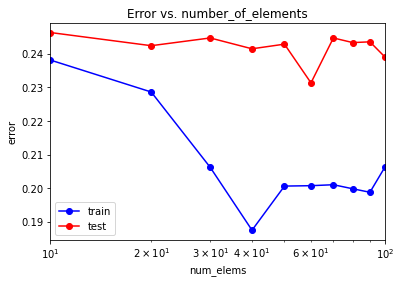

In [193]:
plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Error vs. number_of_elements')
plt.xlabel('num_elems')
plt.ylabel('error')
plt.legend()

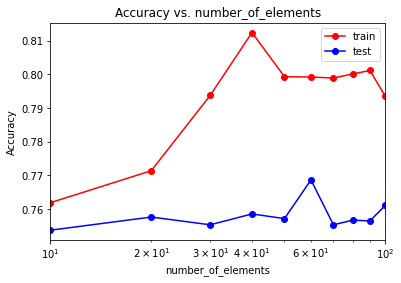

In [194]:
plt.semilogx(num_elems_arr, min_train_accuracy, 'r-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_accuracy, 'b-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Accuracy vs. number_of_elements')
plt.xlabel('number_of_elements')
plt.ylabel('Accuracy')
plt.legend()

In [206]:
print(min_test_errors[5])
print(alpha_opts[5])

0.23131754426304899
[3.16227766]


Выводы: наименьшая ошибка, равная ~0.2313 наблюдается при количестве нейронов, равным 60.

## Заключение для второго практического домашнего задания

В рамках данного домашнего задания можно сделать следующие выводы:
* Был проведён ряд запусков нейронной сети с различным количеством нейронов и подбором параметра alpha;
* Наилучшие результаты были получены при использовании нейронной сети с одним скрытым слоем с 60 нейронами при параметре alpha = 3.16227766. Ошибка на тестовой выборке составила 23.1%;
* При использовании 2 слоёв нейронной сети самый лучший результат получился при использовании слоёв по 10 нейронов каждый. Ошибка на тестовой выборке составила 24.8%;
* При использовании алгоритма KNN в наилучшем случае удалось добиться ошибки в 26.6% на тестовой выборке. Таким образом, нейронная сеть дала результат лучше на 3.5%. 

# Дополнительные задания

Запустим ряд других классификаторов.

## Gradient boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(50,501,50)]

for i in est_vals:
    boost = GradientBoostingClassifier(n_estimators = i)
    boost.fit(x_train, y_train)

    y_test_predict = boost.predict(x_test)
    err_train = np.mean(y_train != boost.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  50
err_train: 0.23089748749496924
err_test: 0.23683605426534834
---------
n_estimators =  100
err_train: 0.21612142816075433
err_test: 0.22970797884571165
---------
n_estimators =  150
err_train: 0.205025010061519
err_test: 0.22212002759255
---------
n_estimators =  200
err_train: 0.19720577243718737
err_test: 0.21890089675787539
---------
n_estimators =  250
err_train: 0.19024895072730408
err_test: 0.21637157967348816
---------
n_estimators =  300
err_train: 0.18352210659460702
err_test: 0.21430213842262588
---------
n_estimators =  350
err_train: 0.17679526246190996
err_test: 0.21430213842262588
---------
n_estimators =  400
err_train: 0.17081584545506814
err_test: 0.21292251092205106
---------
n_estimators =  450
err_train: 0.16518139481400562
err_test: 0.2124626350885261
---------
n_estimators =  500
err_train: 0.15948944977864657
err_test: 0.213382386755576
---------
best: 0.16518139481400562 0.2124626350885261


Text(0, 0.5, 'error')

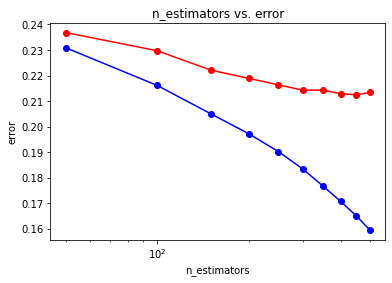

In [96]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [101]:
boost = GradientBoostingClassifier(n_estimators = 450)
boost.fit(x_train, y_train)

y_test_predict = boost.predict(x_test)
err_train = np.mean(y_train != boost.predict(x_train))
err_test = np.mean(y_test != y_test_predict)
print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[  49   27    2    2]
 [  42 2649  318  312]
 [   2   19   14    5]
 [   1  138   58  711]]
              precision    recall  f1-score   support

           1       0.43      0.51      0.47        94
           2       0.81      0.81      0.81      2833
           3       0.26      0.21      0.23       392
           4       0.66      0.71      0.68      1030

    accuracy                           0.72      4349
   macro avg       0.54      0.56      0.55      4349
weighted avg       0.72      0.72      0.72      4349



Самый лучший результат для метода Gradient Boost по ошибке на тесте достигает 21.2%.

## Random forest classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(25,201,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)

    y_test_predict = rfc.predict(x_test)
    err_train = np.mean(y_train != rfc.predict(x_train))
    err_test  = np.mean(y_test  != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  25
err_train: 0.004082101995055482
err_test: 0.1903885950793286
---------
n_estimators =  50
err_train: 0.0015523486460070142
err_test: 0.18808921591170383
---------
n_estimators =  75
err_train: 0.001379865463117346
err_test: 0.18739940216141643
---------
n_estimators =  100
err_train: 0.001379865463117346
err_test: 0.18647965049436652
---------
n_estimators =  125
err_train: 0.001379865463117346
err_test: 0.18601977466084157
---------
n_estimators =  150
err_train: 0.001379865463117346
err_test: 0.1848700850770292
---------
n_estimators =  175
err_train: 0.001379865463117346
err_test: 0.18349045757645435
---------
n_estimators =  200
err_train: 0.001379865463117346
err_test: 0.1848700850770292
---------
best: 0.001379865463117346 0.18349045757645435


Text(0, 0.5, 'error')

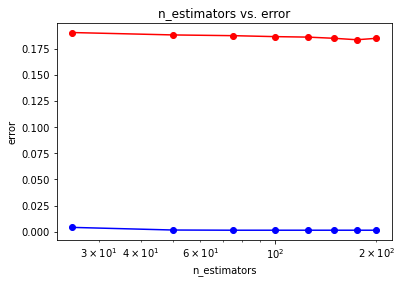

In [94]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [102]:
rfc = RandomForestClassifier(n_estimators=175)
rfc.fit(x_train, y_train)

y_test_predict = rfc.predict(x_test)
err_train = np.mean(y_train != rfc.predict(x_train))
err_test  = np.mean(y_test  != y_test_predict)

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[  43   18    1    1]
 [  49 2696  307  268]
 [   1   10   47    0]
 [   1  109   37  761]]
              precision    recall  f1-score   support

           1       0.43      0.51      0.47        94
           2       0.81      0.81      0.81      2833
           3       0.26      0.21      0.23       392
           4       0.66      0.71      0.68      1030

    accuracy                           0.72      4349
   macro avg       0.54      0.56      0.55      4349
weighted avg       0.72      0.72      0.72      4349



Самый лучший результат для Random forest classifier - 18.3% ошибки на тестовой выборке.

## Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier


err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


max_depths = [x for x in range(2, 16, 2)]

for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)

    y_test_predict = dtc.predict(x_test)
    err_train = np.mean(y_train != dtc.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("max_depth = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

max_depth =  2
err_train: 0.3246708445926522
err_test: 0.3147850080478271
---------
max_depth =  4
err_train: 0.29120910711205655
err_test: 0.28673258220280523
---------
max_depth =  6
err_train: 0.2513654918645432
err_test: 0.25569096343987124
---------
max_depth =  8
err_train: 0.22790777899154832
err_test: 0.2490227638537595
---------
max_depth =  10
err_train: 0.2035876502041051
err_test: 0.24143481260059785
---------
max_depth =  12
err_train: 0.17576036336457196
err_test: 0.24442400551851
---------
max_depth =  14
err_train: 0.14155119875812108
err_test: 0.24258450218441022
---------
best: 0.2035876502041051 0.24143481260059785


Text(0, 0.5, 'error')

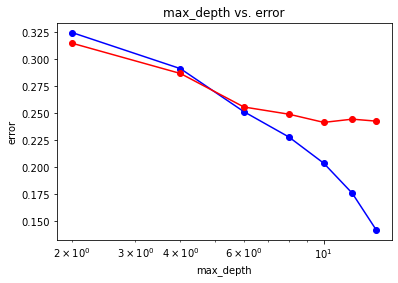

In [117]:
plt.semilogx(max_depths, train_errors, 'b-o', label = 'train')
plt.semilogx(max_depths, test_errors, 'r-o', label = 'test')
plt.title('max_depth vs. error')
plt.xlabel('max_depth')
plt.ylabel('error')

In [118]:
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[  37   53    1    3]
 [  41 2571   74  147]
 [   3  303   39   47]
 [   4  346   33  647]]
              precision    recall  f1-score   support

           1       0.44      0.39      0.41        94
           2       0.79      0.91      0.84      2833
           3       0.27      0.10      0.14       392
           4       0.77      0.63      0.69      1030

    accuracy                           0.76      4349
   macro avg       0.56      0.51      0.52      4349
weighted avg       0.73      0.76      0.73      4349



Лучший результат для данного метода - 24.1% на тестовой выборке.

## Несбалансированность классов

Попробуем побороться с несбалансированностью классов.

In [123]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")
    
rus = RandomOverSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")

n_neighbors: 1
train error:  0.0006082725060827251
test error:  0.547022303977926
--------------
n_neighbors: 2
train error:  0.23357664233576642
test error:  0.5244883881352035
--------------
n_neighbors: 5
train error:  0.31630170316301703
test error:  0.5228788227178661
--------------
n_neighbors: 10
train error:  0.35827250608272504
test error:  0.5219590710508163
--------------
n_neighbors: 15
train error:  0.38017031630170317
test error:  0.5134513681306048
--------------
n_neighbors: 20
train error:  0.3886861313868613
test error:  0.5148309956311796
--------------
n_neighbors: 1
train error:  0.0006082725060827251
test error:  0.547022303977926
--------------
n_neighbors: 2
train error:  0.23357664233576642
test error:  0.5244883881352035
--------------
n_neighbors: 5
train error:  0.31630170316301703
test error:  0.5228788227178661
--------------
n_neighbors: 10
train error:  0.35827250608272504
test error:  0.5219590710508163
--------------
n_neighbors: 15
train error:  0.380

In [127]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
print("train error: ", np.mean(knn.predict(x_train) != y_train))
print("test error: ",np.mean(y_test_pred != y_test))
print("--------------")

print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test, y_test_pred))

train error:  0.38017031630170317
test error:  0.5134513681306048
--------------
[[  88  376   40   54]
 [   4 1403  138  228]
 [   1  732  150  273]
 [   1  322   64  475]]
              precision    recall  f1-score   support

           1       0.16      0.94      0.27        94
           2       0.79      0.50      0.61      2833
           3       0.13      0.38      0.19       392
           4       0.55      0.46      0.50      1030

    accuracy                           0.49      4349
   macro avg       0.41      0.57      0.39      4349
weighted avg       0.66      0.49      0.54      4349



И для Oversampling, и для Undersampling наблюдается очень сильное увеличение ошибки на тестовой и обучающей выборках. Связано это с малым количеством данных для 1 класса. Если бы данных было больше, возможно, данные методы борьбы с несбалансированностью данных сработали бы лучше.

## Коррелированные данные

Попробуем избавиться от коррелированных данных. Для этого обратимся к корреляционной матрице. Удалим столбцы End_Lat, End_Lng, Temperature.

In [103]:
x_data.describe()

,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,...,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,...,2.174200e+04,2.174200e+04,2.174200e+04,21742.000000,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04
mean,0.162773,0.837227,0.029068,0.074602,0.016558,0.031506,0.026814,0.024745,0.020789,0.037301,...,1.227224e-14,4.973995e-15,4.889026e-15,0.000000,1.045781e-17,-1.045781e-16,3.712522e-16,-8.617234e-15,5.228904e-17,-2.222284e-16
std,0.369166,0.369166,0.168001,0.262754,0.127610,0.174684,0.161545,0.155350,0.142681,0.189503,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.456864e+00,-2.141641e+00,-1.457001e+00,-0.614995,-3.587636e+00,-4.139536e+00,-2.920791e+00,-3.178809e+00,-3.237493e+00,-1.966771e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.435610e-01,-6.748753e-01,-9.435414e-01,-0.613264,-7.686097e-01,-2.922871e-01,-7.542433e-01,-9.054228e-01,3.841531e-01,-7.126388e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.946396e-02,-3.253263e-01,3.942019e-02,-0.375122,2.540710e-02,-1.491538e-01,7.110838e-02,3.597658e-01,3.841531e-01,-8.557288e-02
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.133641e+00,1.018831e+00,1.132750e+00,0.128007,8.354109e-01,1.226548e-01,8.448756e-01,7.551373e-01,3.841531e-01,5.414930e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.256049e+00,1.982481e+00,2.256190e+00,7.679266,2.109035e+00,2.956404e+00,1.567058e+00,2.178474e+00,4.196412e+00,3.802236e+00


In [104]:
new_x_data = x_data.drop(["End_Lat", "End_Lng", "Temperature(F)"], axis=1)
new_x_data.describe()

,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,...,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Start_Lat,Start_Lng,Distance(mi),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,...,21742.000000,21742.000000,2.174200e+04,2.174200e+04,21742.000000,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04,2.174200e+04
mean,0.162773,0.837227,0.029068,0.074602,0.016558,0.031506,0.026814,0.024745,0.020789,0.037301,...,0.856315,0.143685,-6.587112e-15,1.227224e-14,0.000000,-1.045781e-16,3.712522e-16,-8.617234e-15,5.228904e-17,-2.222284e-16
std,0.369166,0.369166,0.168001,0.262754,0.127610,0.174684,0.161545,0.155350,0.142681,0.189503,...,0.350778,0.350778,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.141849e+00,-1.456864e+00,-0.614995,-4.139536e+00,-2.920791e+00,-3.178809e+00,-3.237493e+00,-1.966771e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-6.759013e-01,-9.435610e-01,-0.613264,-2.922871e-01,-7.542433e-01,-9.054228e-01,3.841531e-01,-7.126388e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,-3.252703e-01,3.946396e-02,-0.375122,-1.491538e-01,7.110838e-02,3.597658e-01,3.841531e-01,-8.557288e-02
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.020989e+00,1.133641e+00,0.128007,1.226548e-01,8.448756e-01,7.551373e-01,3.841531e-01,5.414930e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.982281e+00,2.256049e+00,7.679266,2.956404e+00,1.567058e+00,2.178474e+00,4.196412e+00,3.802236e+00


На основе этих данных запустить метод kNN.

In [131]:
x_train, x_test, y_train, y_test = train_test_split(new_x_data, y_data, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

for i in [1, 2, 5, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    print("n_neighbors:", i)
    print("train error: ", np.mean(knn.predict(x_train) != y_train))
    print("test error: ",np.mean(knn.predict(x_test) != y_test))
    print("--------------")

(17393, 104) (4349, 104)
n_neighbors: 1
train error:  0.0014948542517104581
test error:  0.279834444699931
--------------
n_neighbors: 2
train error:  0.1427010866440522
test error:  0.2913313405380547
--------------
n_neighbors: 5
train error:  0.20904961766227792
test error:  0.279834444699931
--------------
n_neighbors: 10
train error:  0.24463864773184615
test error:  0.279834444699931
--------------
n_neighbors: 15
train error:  0.25682745932271606
test error:  0.2766153138652564
--------------
n_neighbors: 20
train error:  0.26660150635313057
test error:  0.27408599678086915
--------------


In [132]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
print("train error: ", np.mean(knn.predict(x_train) != y_train))
print("test error: ",np.mean(y_test_pred != y_test))
print("--------------")

print(confusion_matrix(y_test_pred, y_test))
print(classification_report(y_test, y_test_pred))

train error:  0.26660150635313057
test error:  0.27408599678086915
--------------
[[  20   21    1    2]
 [  71 2672  343  565]
 [   0    1    2    0]
 [   3  139   46  463]]
              precision    recall  f1-score   support

           1       0.45      0.21      0.29        94
           2       0.73      0.94      0.82      2833
           3       0.67      0.01      0.01       392
           4       0.71      0.45      0.55      1030

    accuracy                           0.73      4349
   macro avg       0.64      0.40      0.42      4349
weighted avg       0.72      0.73      0.67      4349



Самый лучший результат - 27.4% на тестовой выборке, что отличается от лучшего случая при запуске без удаления коррелированных данных на 0.6%.

## Общие выводы

* Самый лучший результат показал метод Random forest classifier с ошибкой в 18.3%.
* Самый худший результат показал метод KNN с ошибкой на тестовой выборке в 26.6%.
* Decision Tree Classifier показал результат в 24.1% ошибки на тестовой выборке, Gradient Boosting - 21.2%
* Методы oversampling и undersampling не подходят для борьбы с несбалансированностью классов в данном случае.